In [11]:
import numpy as np
from matplotlib import cycler
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns

import simpy
import random
import bisect

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

# Poisson probability function for discrete events

The Poisson distribution has the following characteristics 
- counts are for rare events
- all events are independent
- the average number of events ($\lambda$) is constant over the period of interest. 

The Poisson probability mass function (PMF) is defined as:

$$f(k;\lambda )= P ( X = k) = {\frac {\lambda ^{k}e^{-\lambda }}{k!}}$$

Where $k$ is the integer number of occurances.

## Poisson statistics

$\lambda$ is a positive, real number and is conveniently equal to the 
expected value, $E(X)$, of the random variable $X$ as well as the variance of $X$:

$$\lambda = E(X) = \sigma^2$$

The standard deviation of a Poisson distribution is simply:

$$\sigma = \sqrt{\lambda}$$

The best estimate for the error if an experiment yeilds a mean count of
$\lambda$, is simply $\sqrt{\lambda}$. 
Measurements are therefore reported as having:

$$\lambda \pm \sqrt{\lambda}$$

i.e. two-thirds of the measurements will fall within 
$\lambda \pm \sqrt{\lambda}$.

# Photon counting

Shot noise exists because phenomena such as light and electric current consist 
of the movement of discrete objects, e.g. photons. 
Consider light — a stream of discrete photons - coming out of a laser pointer 
and hitting a wall to create a visible spot. 
Photons are emitted from the laser at random times. 
The relative fluctuation in number of photons is called shot noise, or Poisson noise. 

Since the standard deviation of shot noise is equal to the square root of the 
average number of events $N$, the signal-to-noise ratio (SNR) is given by:

$$SNR =\frac{N}{\sqrt{N}}=\sqrt{N}$$

Thus when $N$ is very large, the signal-to-noise ratio is very large as well, 
and any relative fluctuations in $N$ due to other sources are more likely to dominate over shot noise. 
However, when the other noise source is at a fixed level, such as thermal noise, 
or grows slower than $\sqrt{N}$, increasing $N$ (the DC current or light level, etc.) 
can lead to dominance of shot noise. 
This is true in the case of photon counting, where shot noise is the lowest possible level of detected photons.
See [this site](http://slittlefair.staff.shef.ac.uk/teaching/phy241/lectures/L09/index.html#ccd-sn)
for a nice explaination of sources of shot noise in astromonical photon counting experiments. 

## Simulate a Poisson discrete random variable

Using `SimPy` and code from [David  Kraemer](https://davidnkraemer.github.io/ln/simulating-with-simpy.html)

In [13]:
ts = []
counts = []   

def simpy_arrival_process(env, rate):  # env is simpy.Environment
    """
    Arrival process, implemented with Simpy in mind
    """
    count = 0  # track number of arrivals
    while True:
        interarrival = random.expovariate(rate)
        # instead of yielding the arrival time, yield a Timeout Event
        yield env.timeout(interarrival)
        counts.append(count)
        count += 1
        # to make things interesting, we add some printouts
        ts.append(env.now)
        #print(f'arrival {count:3d} at time {env.now:5.2f}')

In [14]:
# creates a SimPy Environment
env = simpy.Environment()  

# initializes a new arrival process connected to the Environment
arrivals = simpy_arrival_process(env, 25)  # rate 25

# tell the Environment to process the first arrival Event
env.process(arrivals);

In [15]:
# run the Environment (stopping after t=20)
t = 20

env.run(until=t)

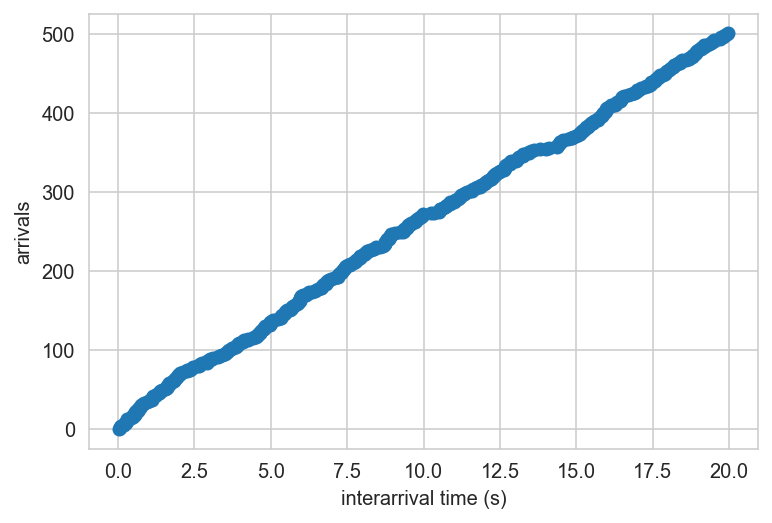

In [16]:
plt.plot(ts, counts, 'o', linewidth=0)
plt.xlabel('interarrival time (s)')
plt.ylabel('arrivals');

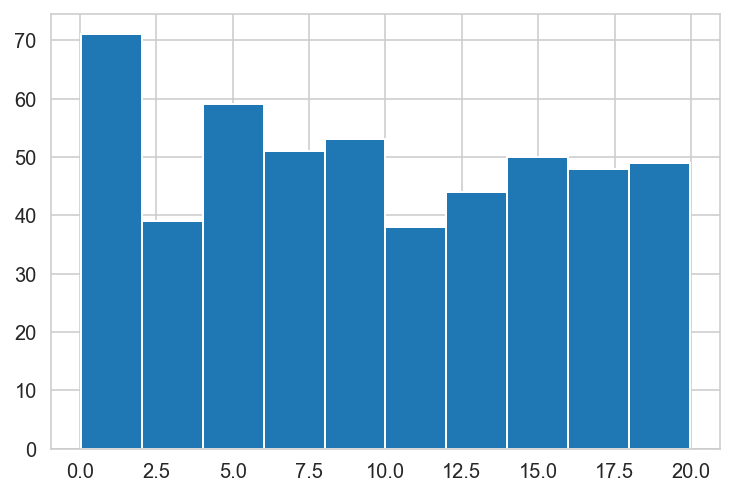

In [18]:
plt.hist(ts);

In [7]:
# generate an array of Poisson random variables 
size = len(ts) # experimental acquisition time in seconds
lam = 25 # average number of photons per unit time

d = np.random.poisson(lam = lam, size = size) # number of photons counted 
d[:10]

array([28, 29, 29, 17, 24, 34, 21, 31, 23, 25])

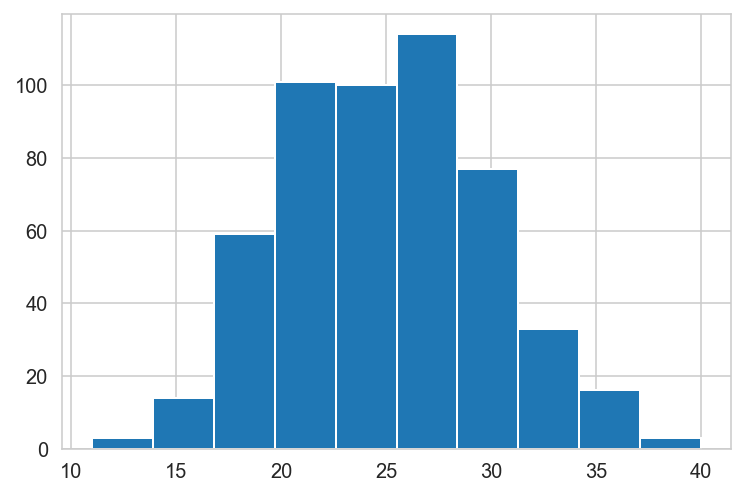

In [20]:
plt.hist(d);

In [8]:
snr = np.sqrt(lam)
error = snr
conf = lam+snr + lam-snr

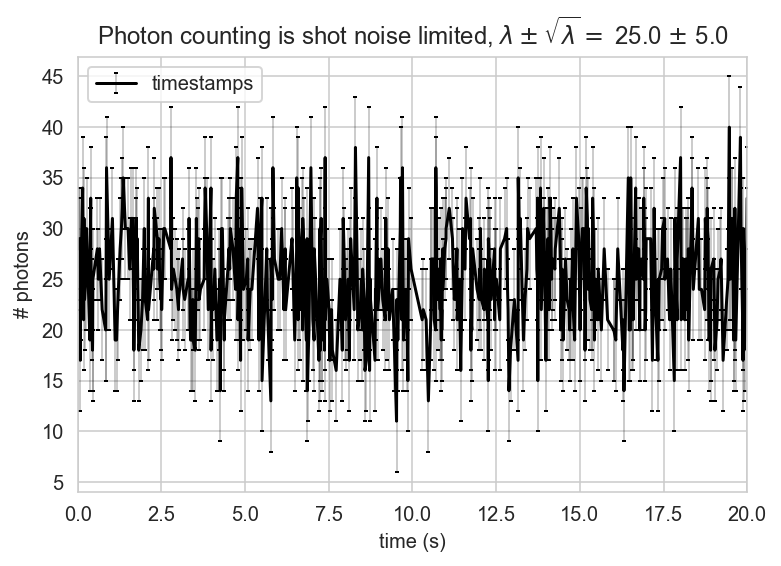

In [9]:
#plt.plot(ts, d, color = 'b', label = f'$\lambda = {lam}$', zorder = 1)
plt.errorbar(x=ts, y=d, yerr=error, color = 'k', elinewidth=0.2, capsize=1, label = 'timestamps', zorder = 1)
#plt.axhline(lam, color = 'r', linewidth = conf, alpha = 0.3, zorder = 2)
plt.xlim(0, t)
plt.xlabel('time (s)')
plt.ylabel('# photons')
plt.title(r'Photon counting is shot noise limited, $\lambda \pm \sqrt{\lambda} =$' + f'{lam: .1f} $\pm$ {snr}')
plt.legend();


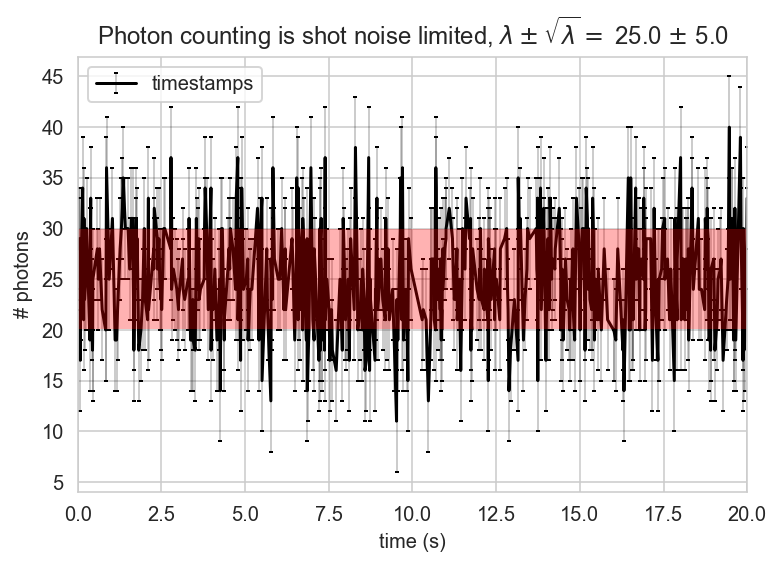

In [10]:
#plt.plot(ts, d, color = 'b', label = f'$\lambda = {lam}$', zorder = 1)
plt.errorbar(x=ts, y=d, yerr=error, color = 'k', elinewidth=0.2, capsize=1, label = 'timestamps', zorder = 1)
plt.axhline(lam, color = 'r', linewidth = conf, alpha = 0.3, zorder = 2)
plt.xlim(0, t)
plt.xlabel('time (s)')
plt.ylabel('# photons')
plt.title(r'Photon counting is shot noise limited, $\lambda \pm \sqrt{\lambda} =$' + f'{lam: .1f} $\pm$ {snr}')
plt.legend();
